# ABOUT THE DATASET
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
 You can find the dataset here[https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code].

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyforest import*
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("creditcard.csv")
df.head(5)

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.shape

(284807, 31)

In [48]:
df.isna().sum().sum()

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
#Checking Unique values in each column
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# checking for potential class imbalance.
There is a class imbalance it is likely that the model which is going to be built will overlook Class 1 which represents Fraudulent transactions and focusses on Class 0 which represents legitimate transactions.
We will need to upscale Class 1, to avoid this bias.

In [51]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Descriptive statistics

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# EDA
I am just limited because I really dont know whats the meaning of the columns🤦‍♂️🤦‍♂️🤦‍♂️, anyway let me share with you what we can get from this data😍😍

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

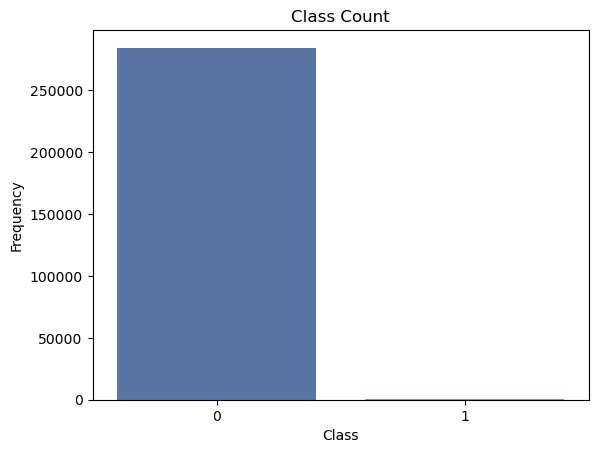

In [53]:
sns.countplot(x = "Class", data = df, palette="deep")
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

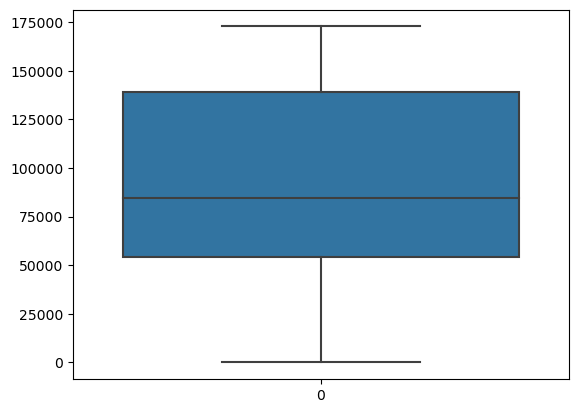

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

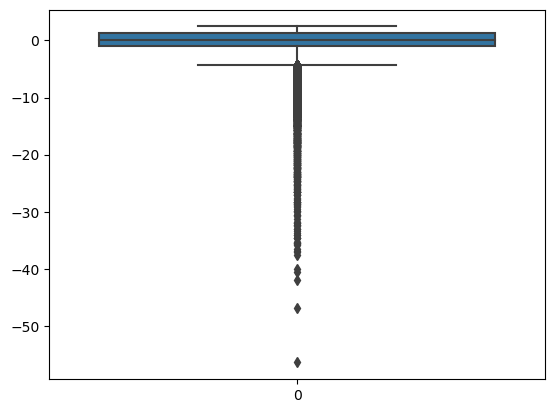

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

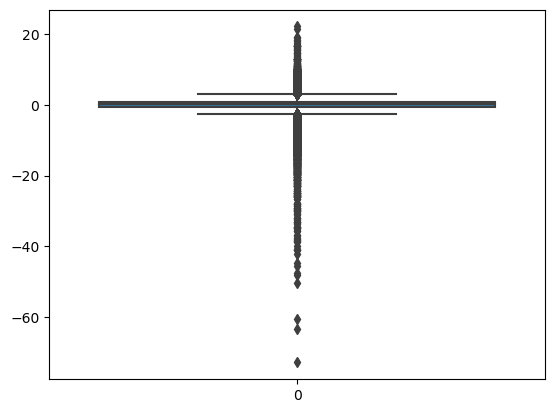

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

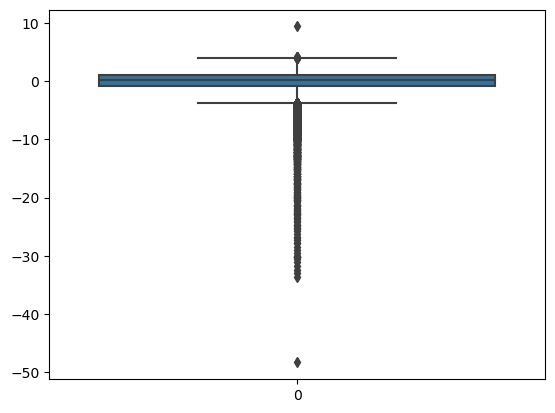

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

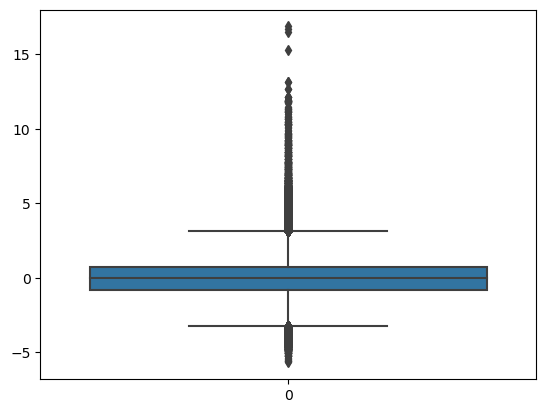

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

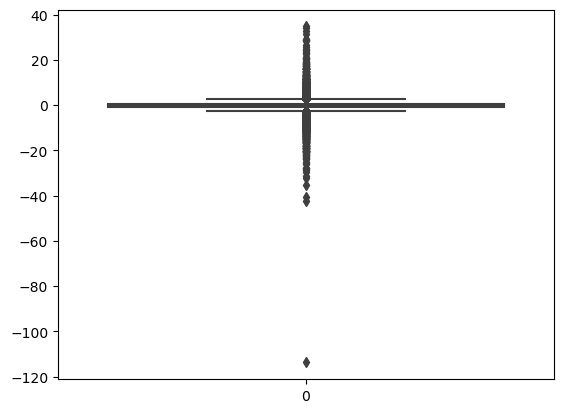

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

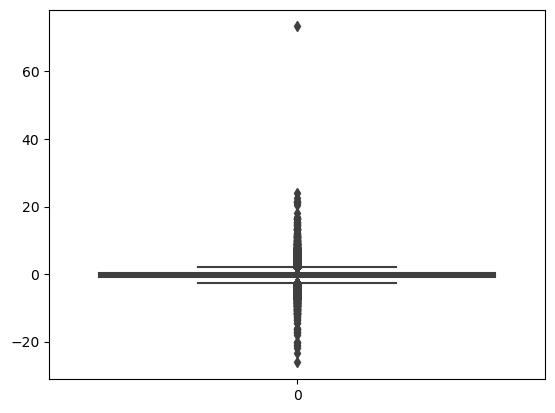

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

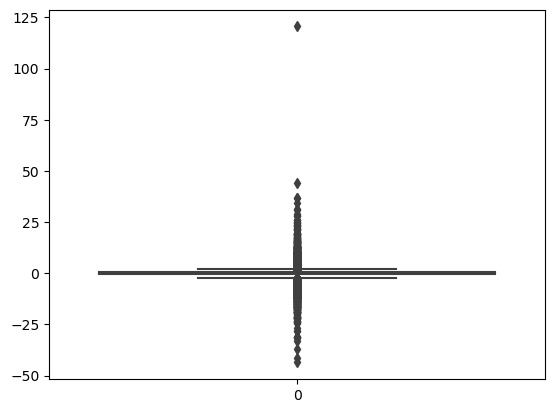

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

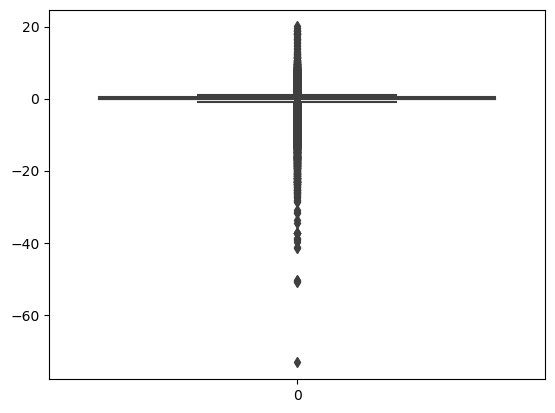

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

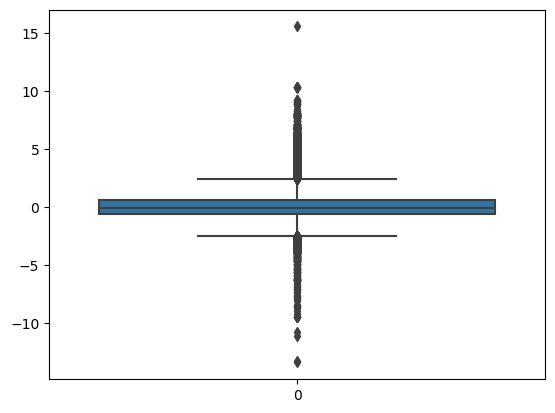

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

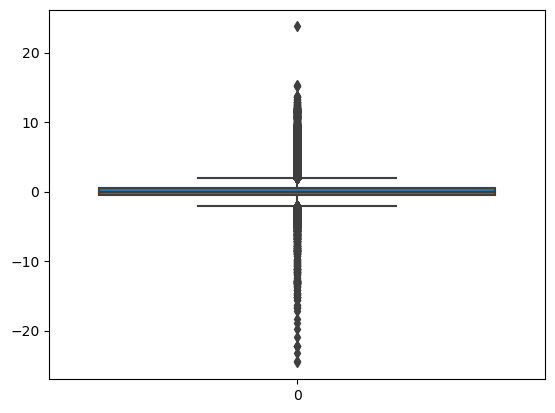

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

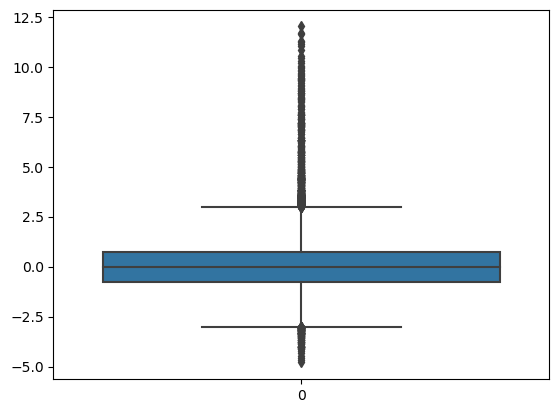

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

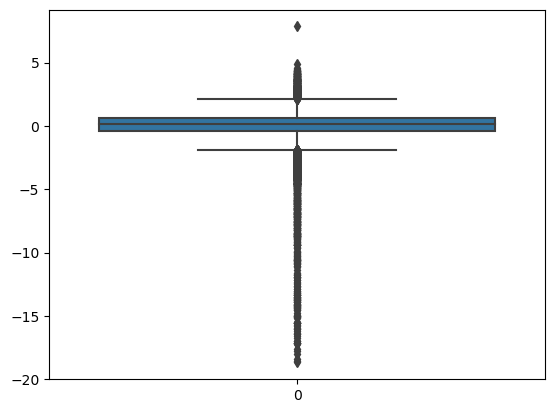

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

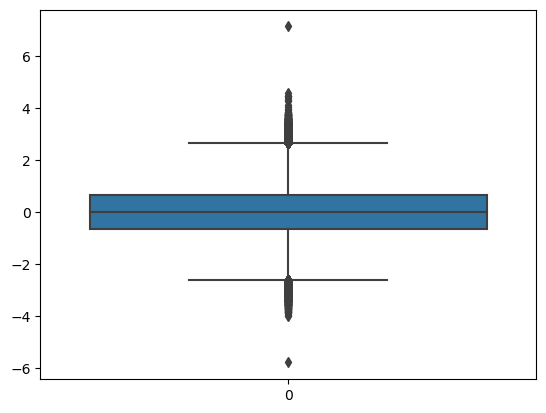

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

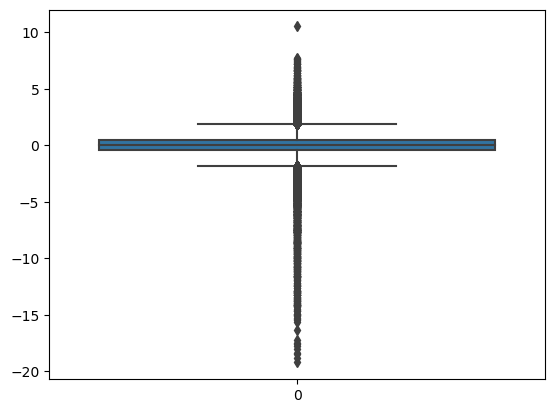

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

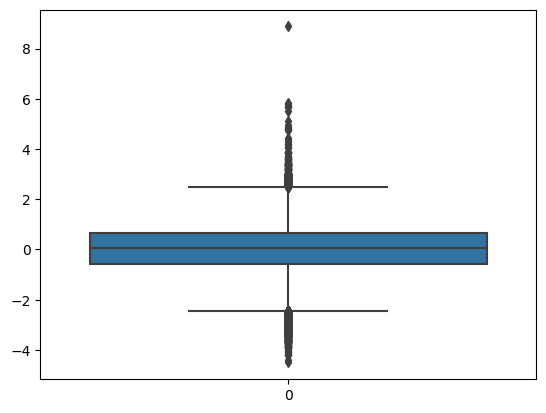

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

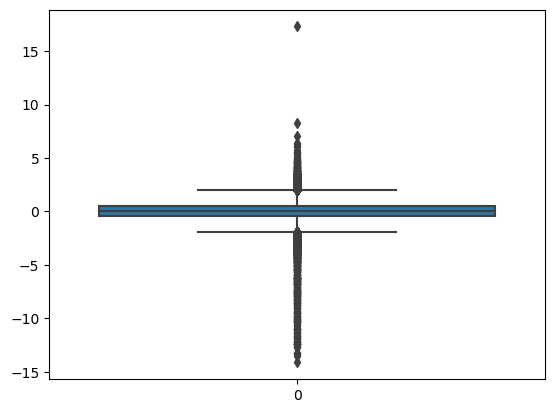

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

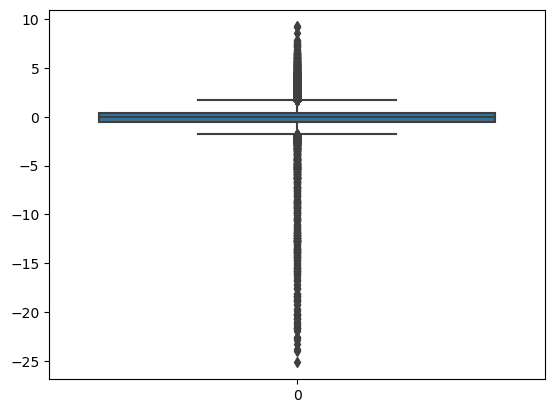

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

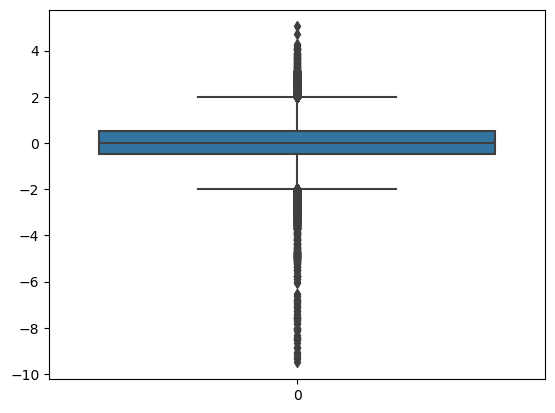

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

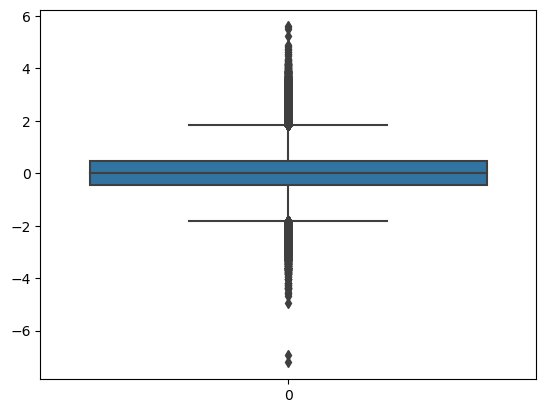

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

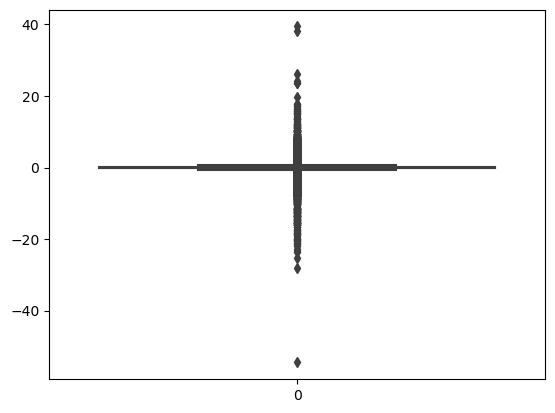

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

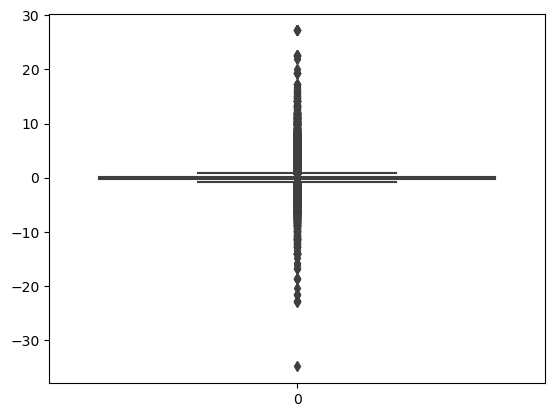

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

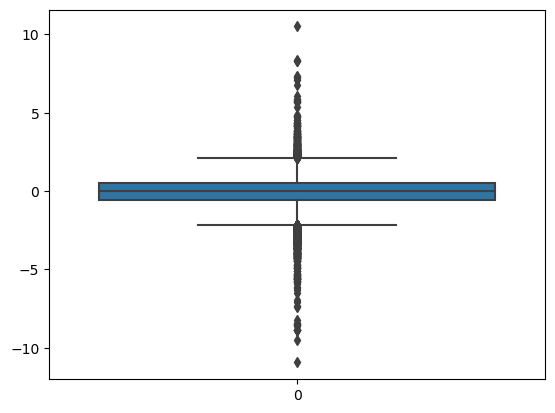

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

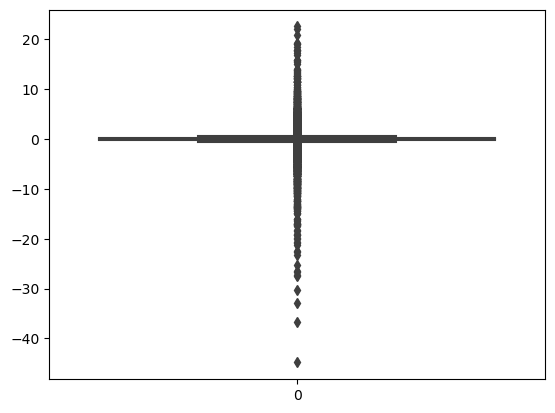

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

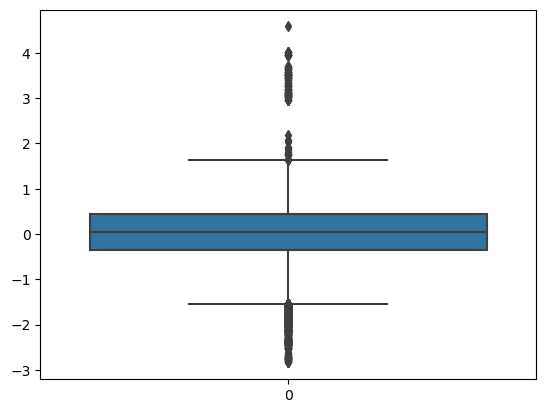

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

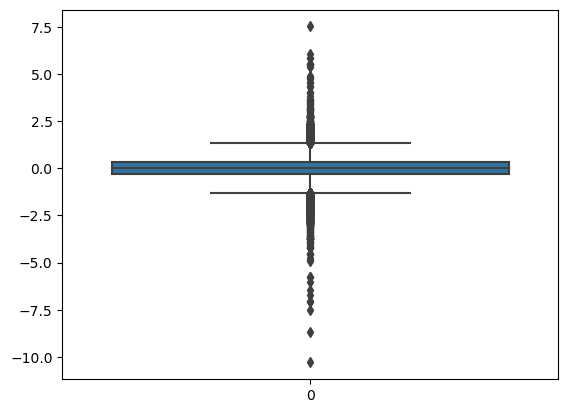

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

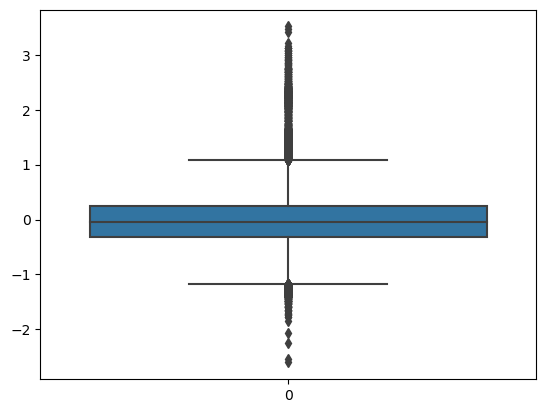

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

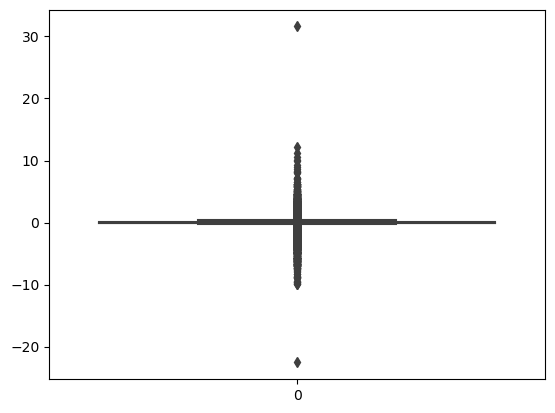

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

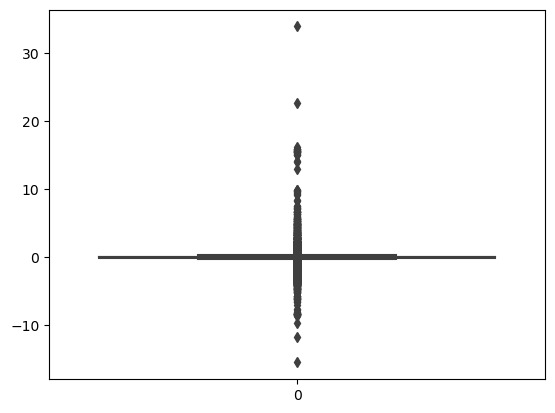

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

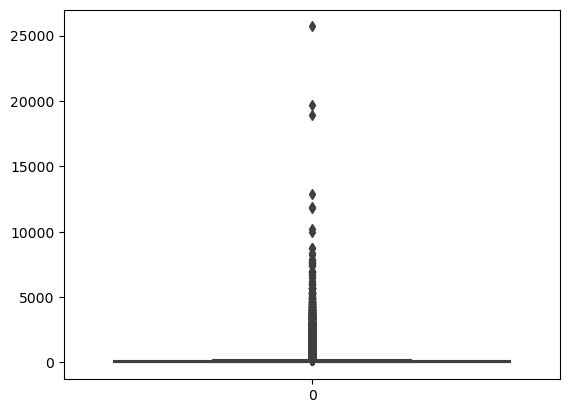

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

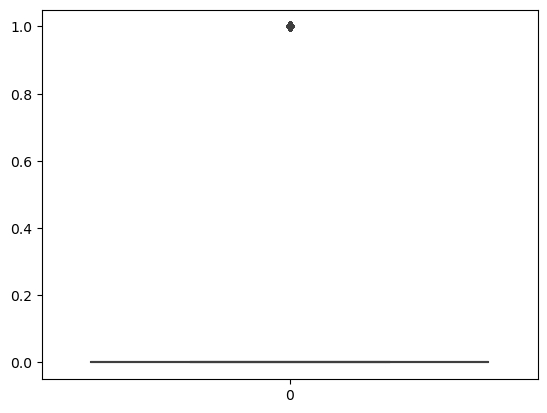

In [54]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()
#We can clearly see the existence of outliers in some of the features but if we delete them, we might delete useful features since our task is to catchfraudulent transactions. Maybe the outliers are useful in catching outliers. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

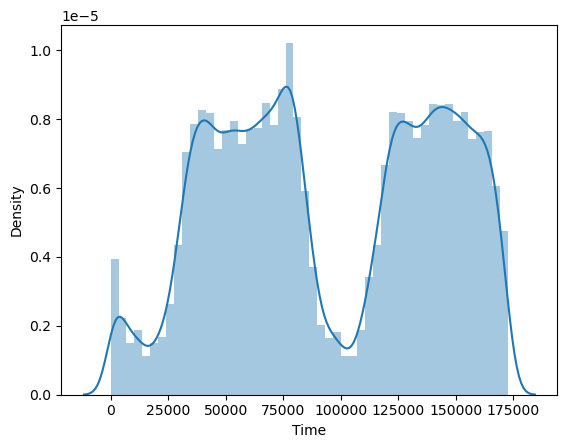

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

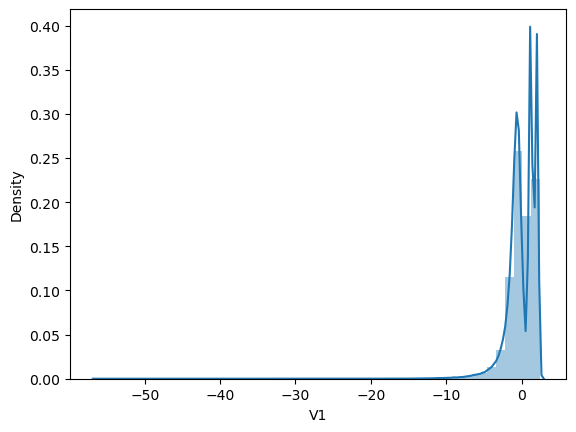

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

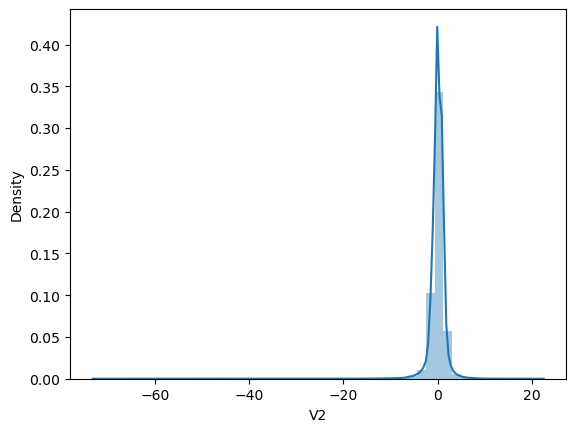

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

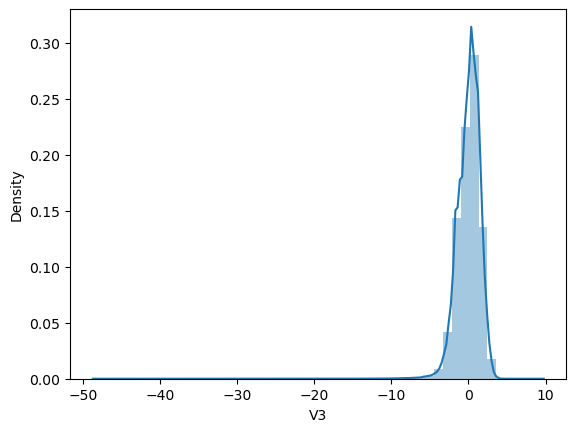

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

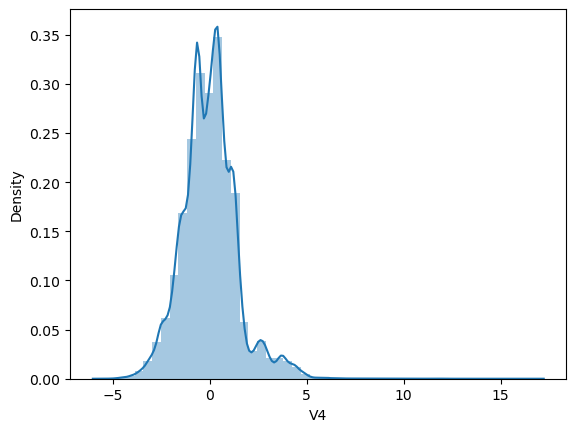

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

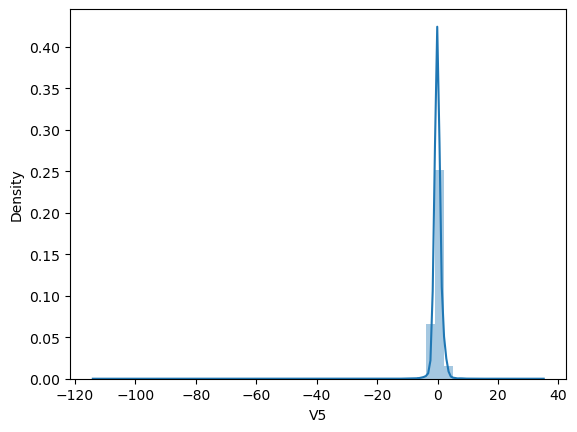

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

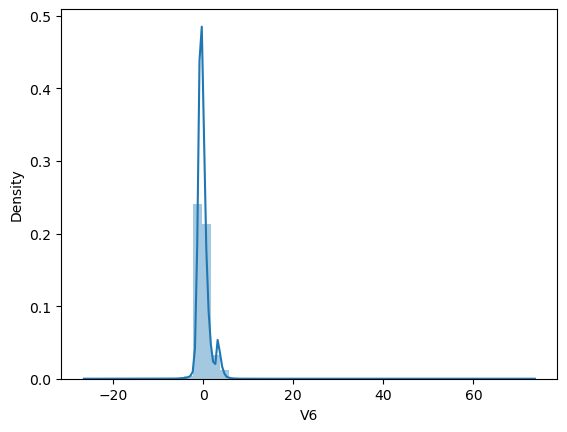

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

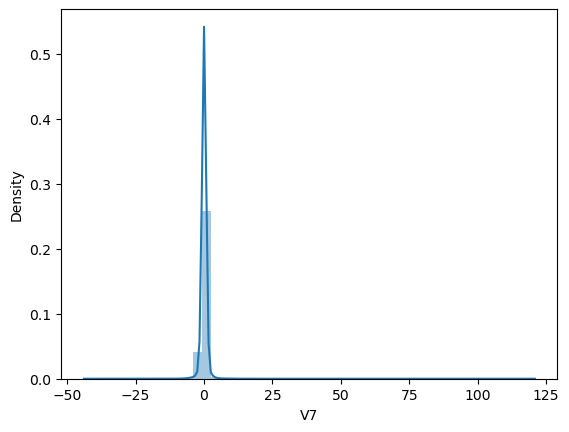

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

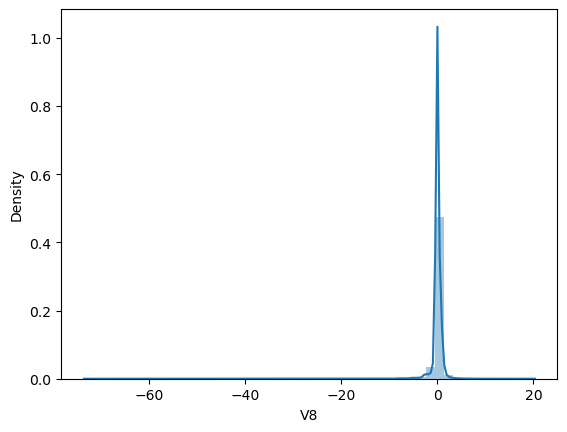

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

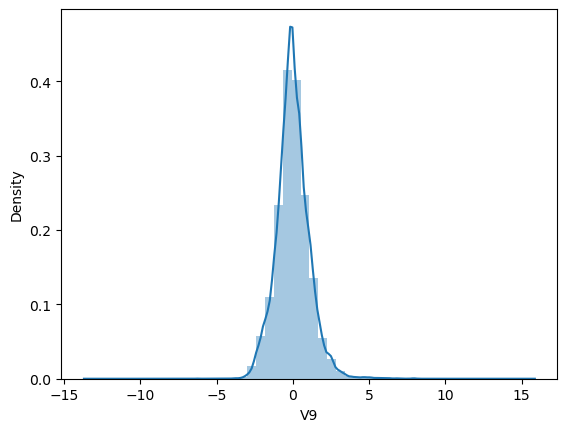

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

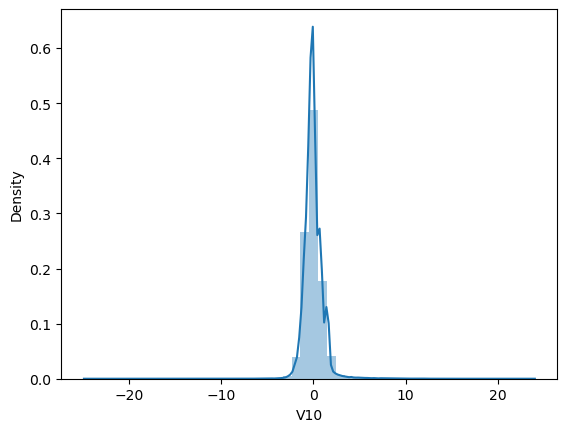

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

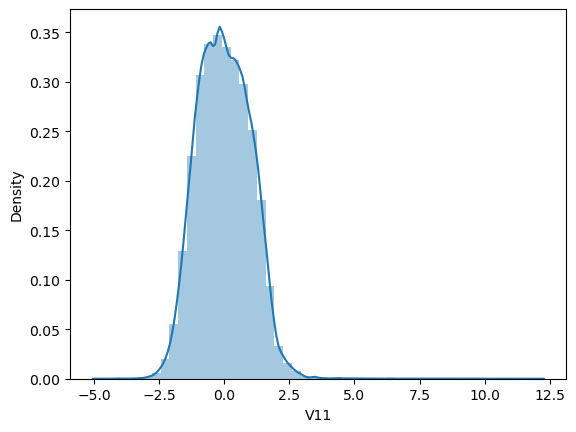

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

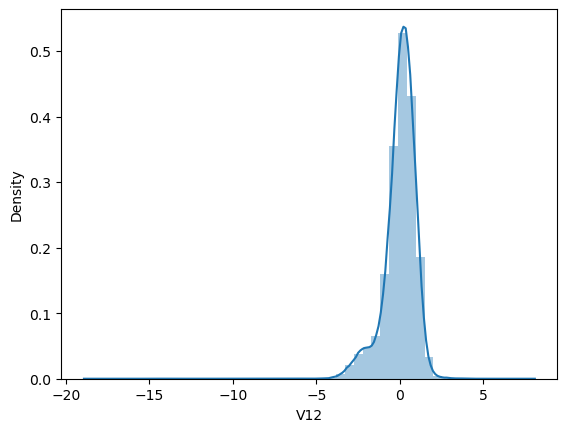

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

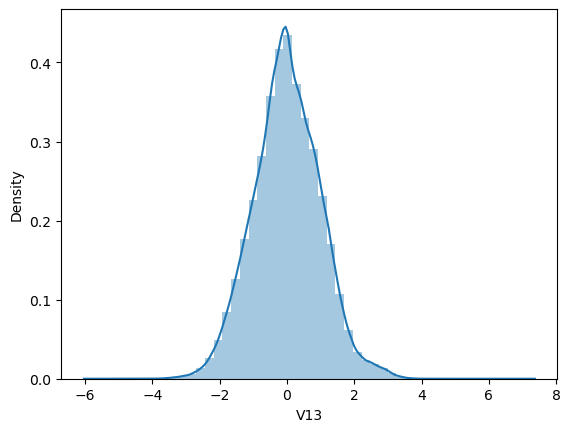

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

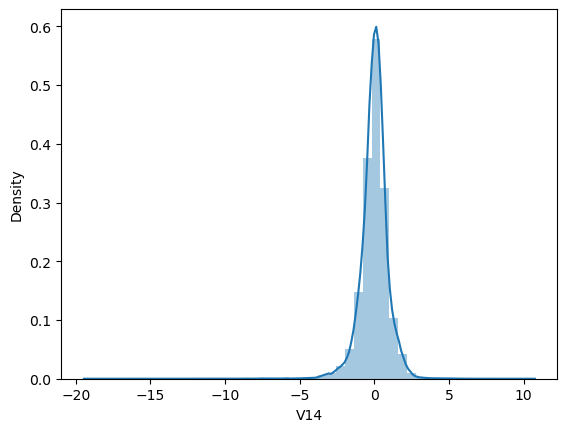

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

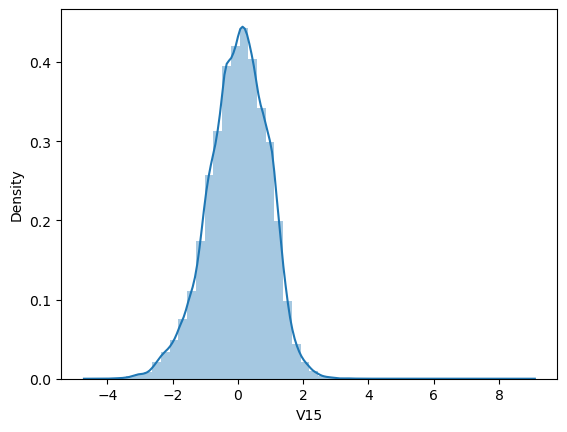

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

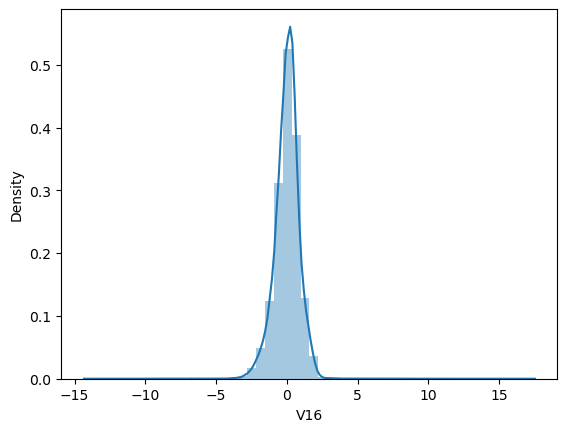

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

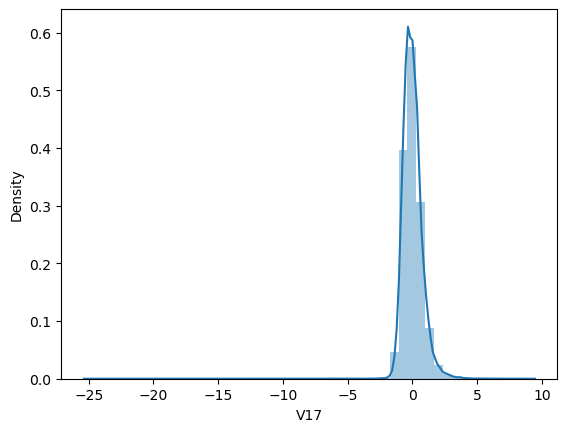

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

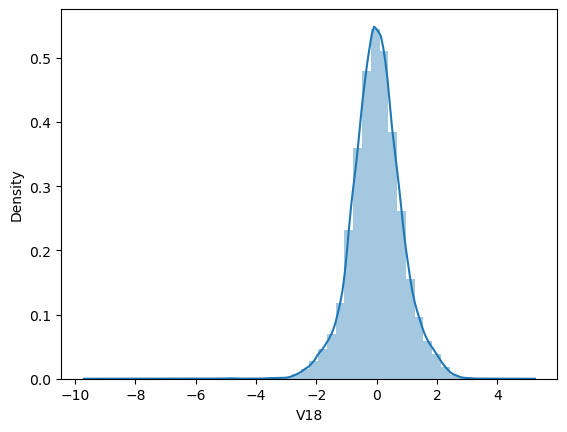

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

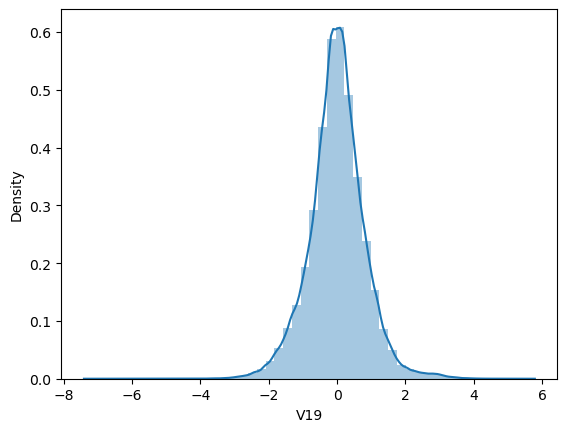

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

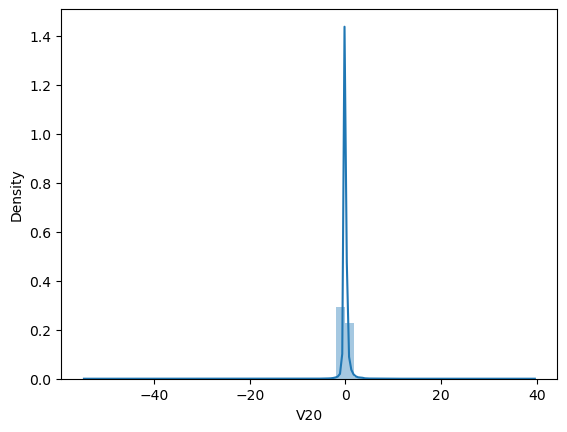

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

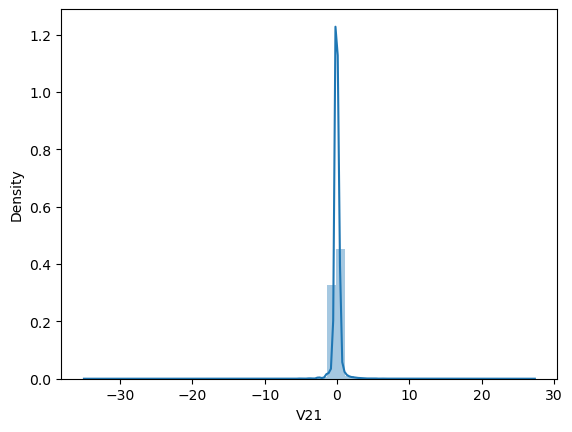

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

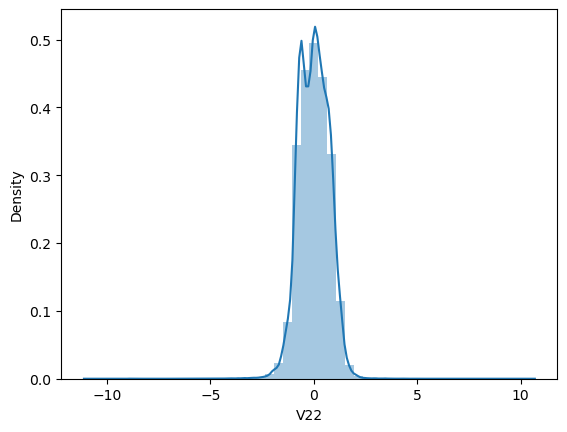

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

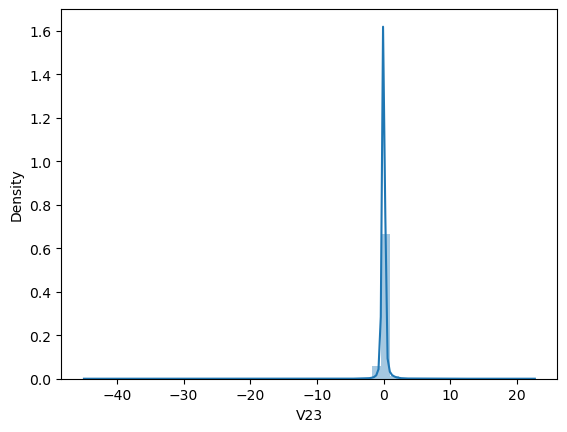

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

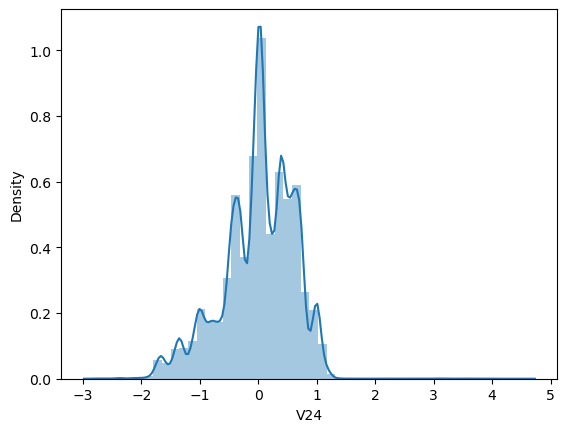

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

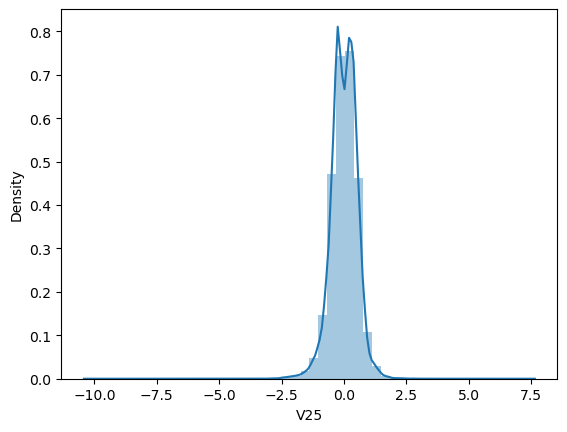

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

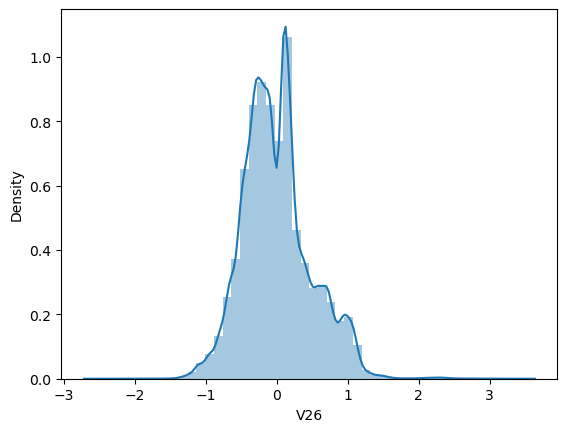

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

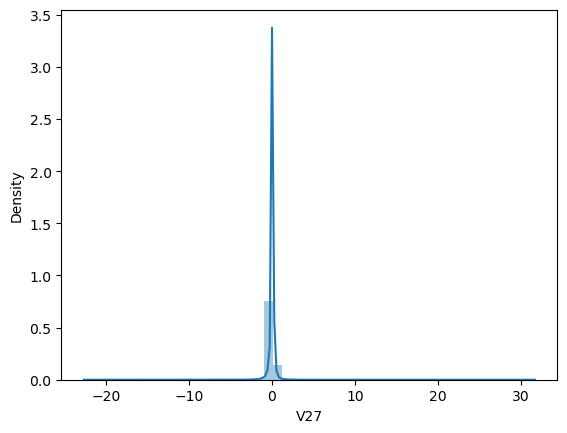

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

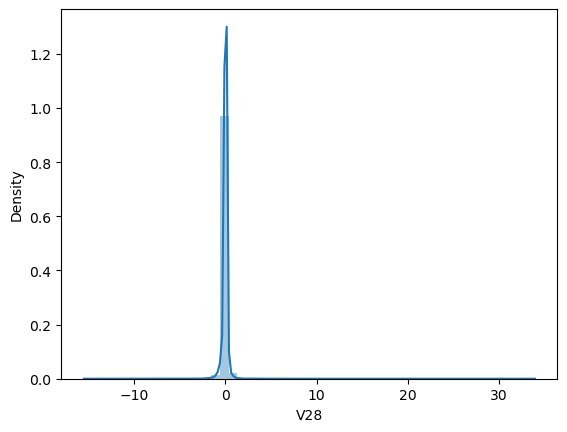

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

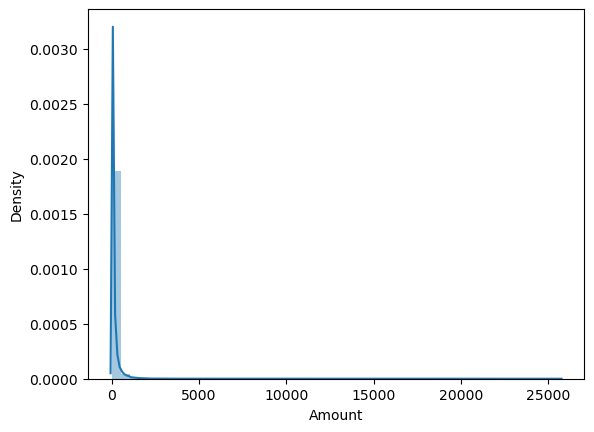

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

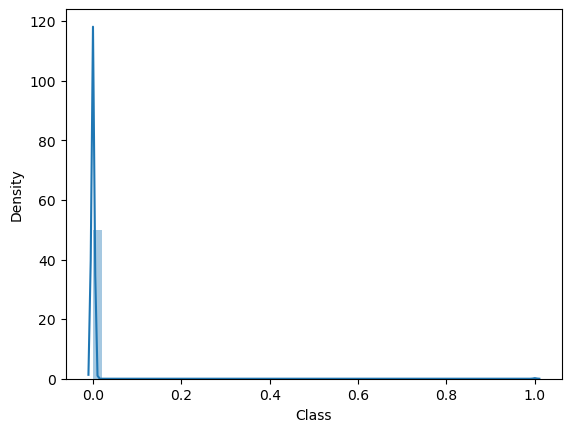

In [55]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()
#Most of the features resembles a normal distribution, however they are ome cases we can clearly see left and right skewed features.

In [56]:
df_corr = df.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

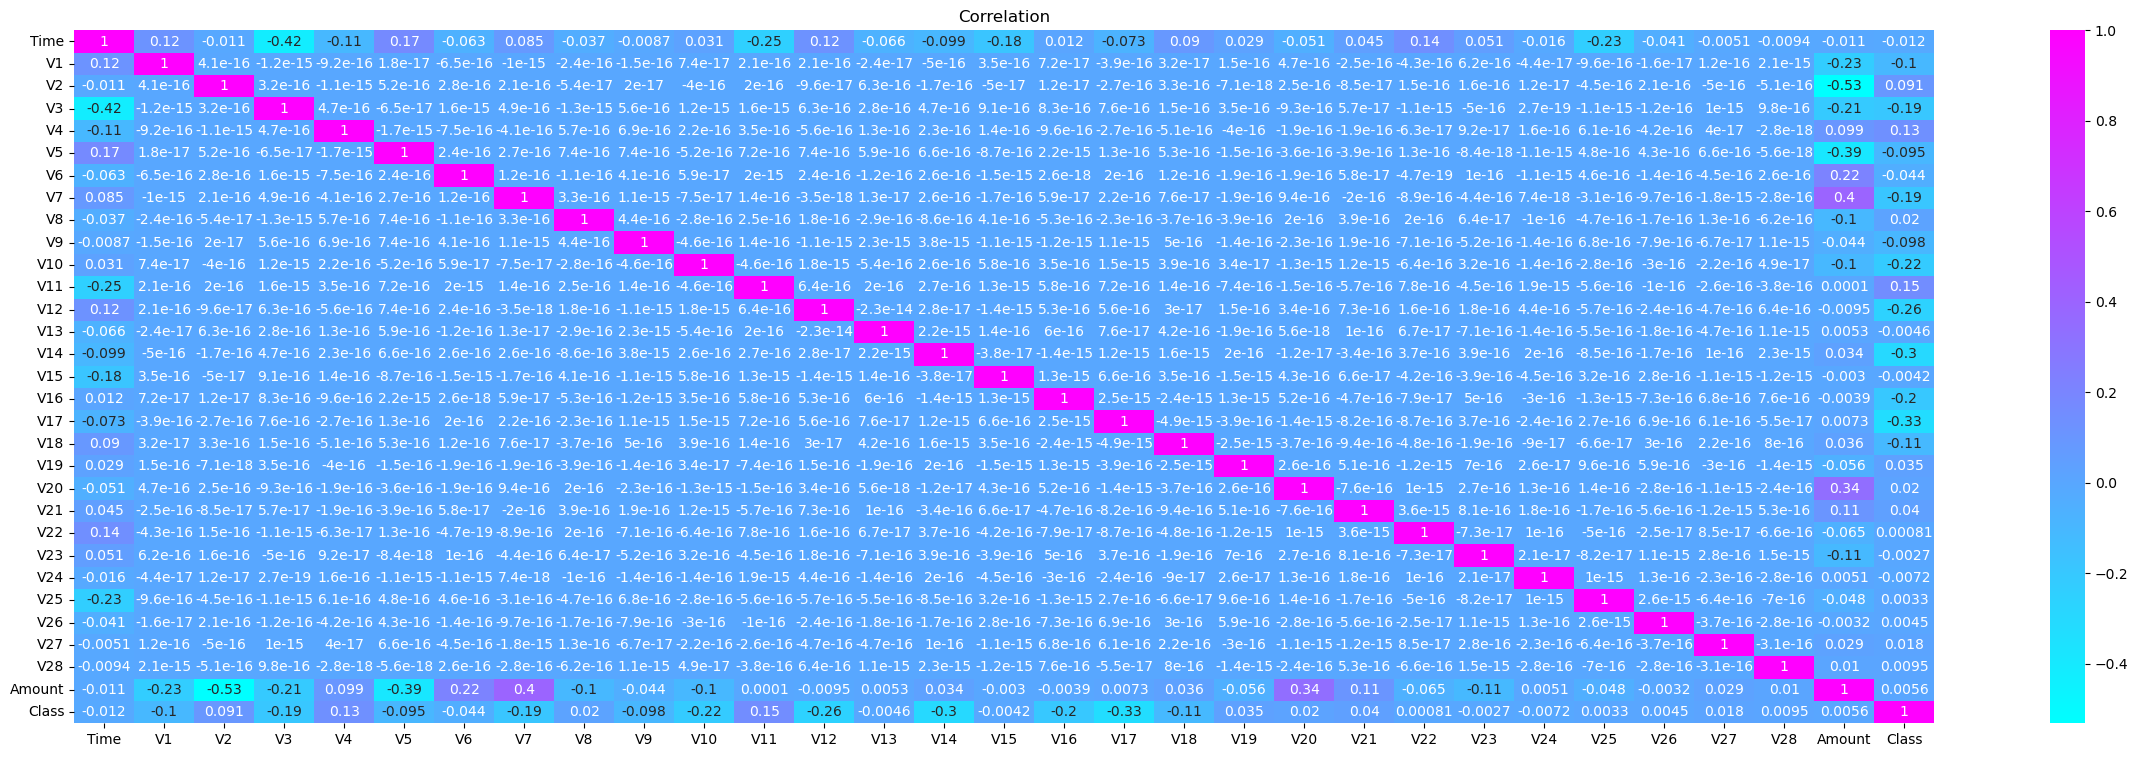

In [57]:
plt.figure(figsize = (30,9))
sns.heatmap(df_corr,annot = True, cmap = "cool")
plt.title("Correlation")
plt.show()
#If the correlation map seems smaller kindly double click it.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

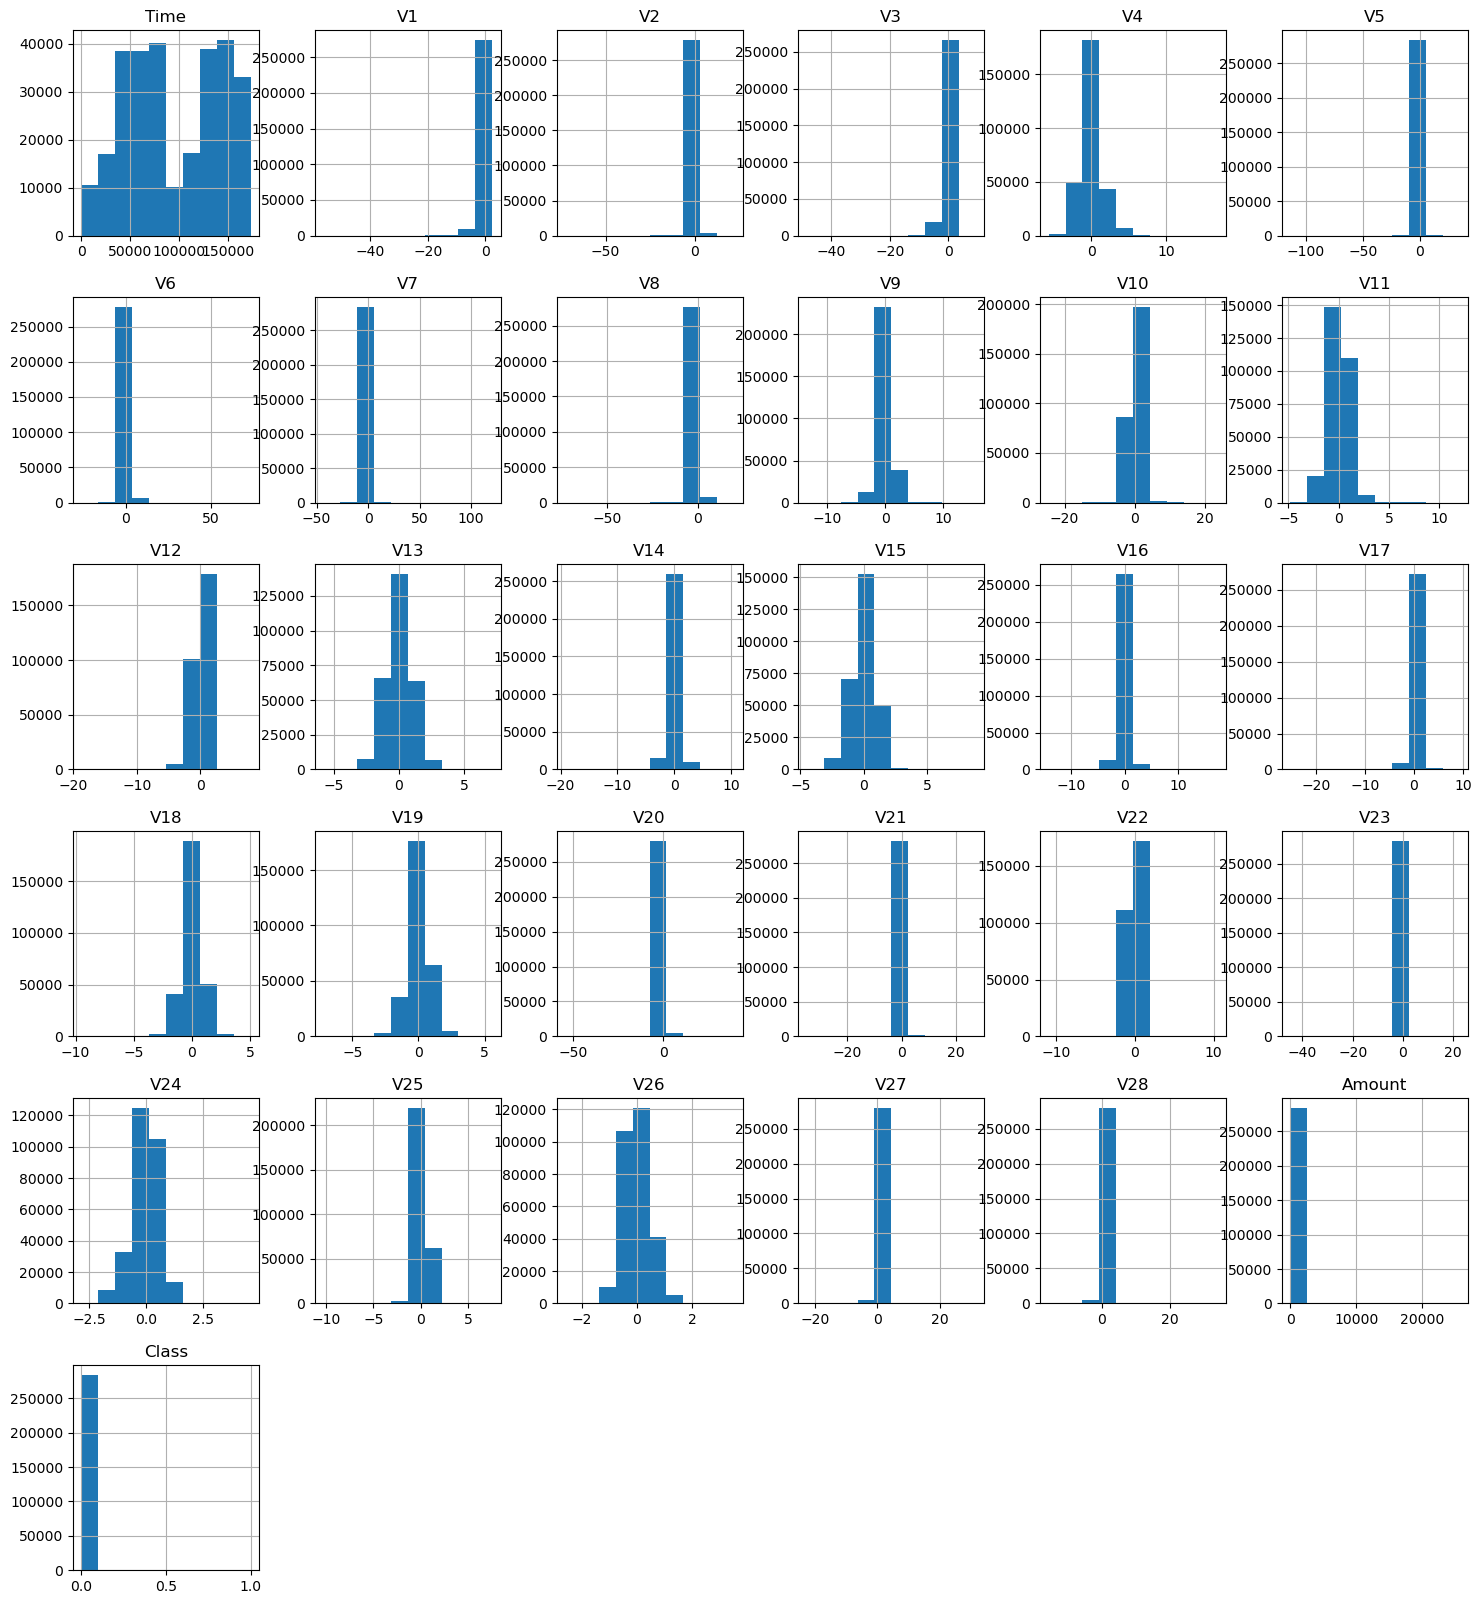

In [58]:
df.hist(figsize=(18,20))

# NOW WE ARE GOING TO USE UPSAMPLING TECHNIQUES TO DEAL WITH DATA IMBALANCE. 
Are you ready?, I am ready lets do it😂😂, If I miss something kindly ping me at [Bennettmhlanga959@gmail.com]
I am going to use upsampling technique.

In [59]:
from sklearn.utils import resample
legit = df[df["Class"]==0]
fraud = df[df["Class"]==1]

#Upsampling the minority class
fraud_upsampled = resample(fraud,
                          replace = True,#sample with replacement
                           n_samples = len(legit)-492,
                           random_state =67
                        
                          )

In [60]:
fraud_upsampled = fraud_upsampled.reset_index(drop=True)#Here we are setting index to start from 0-

In [61]:
Frame = [df, fraud_upsampled]
df = pd.concat(Frame,axis = 0)
df

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283818,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1
283819,141320.0,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,195.66,1
283820,51135.0,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,...,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,99.99,1
283821,29785.0,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1


In [62]:
df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# Our two classes seems to be balanced what does this mean?😒😒,
This means that when training our model each class is treated the same, with same importance and generally our model will perform better on unseen data.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

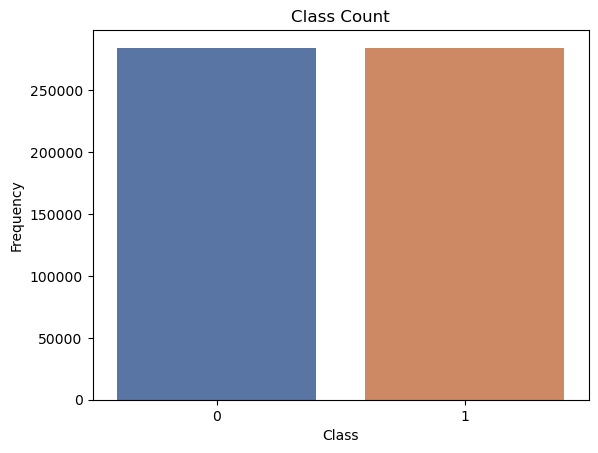

In [63]:
sns.countplot(x = "Class", data = df, palette="deep")
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Lets Split our data. 
We will scale our Time and Amount columns after splitting our data to avoid data leakage.

In [64]:
X = df.drop(columns = "Class", axis =1)
y = df["Class"]

# Scaled Time and Amount columns why🤷‍♂️🤷‍♂️.
Well, we don't want any bias as we train the model each feature should be treared the same. Now all the features have been scaled between the range -1 and 1. We can now go on to split the training and testing data.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X['Amount_'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
X['Time_'] = scaler.fit_transform(X['Time'].values.reshape(-1,1))

X.drop(['Amount','Time'], axis = 1, inplace = True)

Amount_ = X['Amount_']
Time_ = X['Time_']

X.drop(['Amount_','Time_'], axis = 1, inplace = True)

X.insert(0, 'Time_', Time_)
X.insert(1, 'Amount_', Amount_)

In [71]:
X.head()

,Time_,Amount_,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.821449,0.175577,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-1.821449,-0.403130,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.821428,1.077686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-1.821428,0.072699,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.821407,-0.138058,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size =.2, random_state=42)

<IPython.core.display.Javascript object>

# Building the LogisticRegression model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

# Making some predictions

In [74]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_predict,Y_test)

In [79]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

print("Accuracy score:", accuracy)
print("Model ROC:", round(roc_auc_score(Y_test, y_predict),2) , '\n')

Accuracy score: 0.9489650563635404
Model ROC: 0.95 



# Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

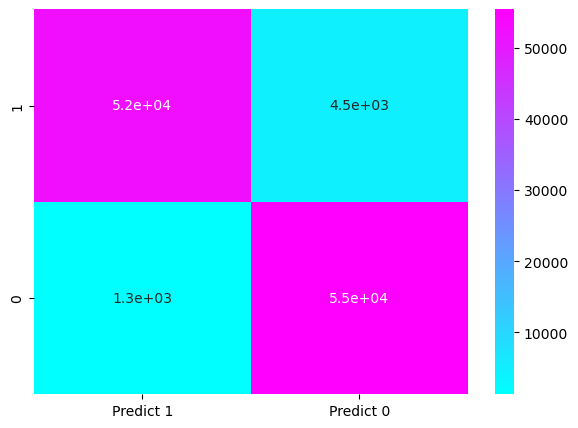

In [83]:
cm = confusion_matrix(Y_test, y_predict, labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, cmap = "cool")

# Confusion Matrix
1. From the confusion matrix above we can see that the true positive has a count 52000. Predicting a Transaction as Fraudulent when it is indeed Fraudulent.
2. True negative has a count 55000. Predicting a transaction as legit when it is indeed legit.
3. False positive has a count 1300. predicting a transaction as Fraudulent when it is legit transaction.
4. False negative has a count 4500. predicting a transaction as legit when it is fraudulent.

In [84]:
print("Classification report")
print(metrics.classification_report(Y_test,y_predict, labels = [1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.98      0.92      0.95     56976
           0       0.92      0.98      0.95     56750

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



# Building the RandomForest Classifier model

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_1 =rf.fit(X_train,Y_train)
y_predict = model_1.predict(X_test)
accuracy_score(Y_test,y_predict)

0.9999648277438756

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

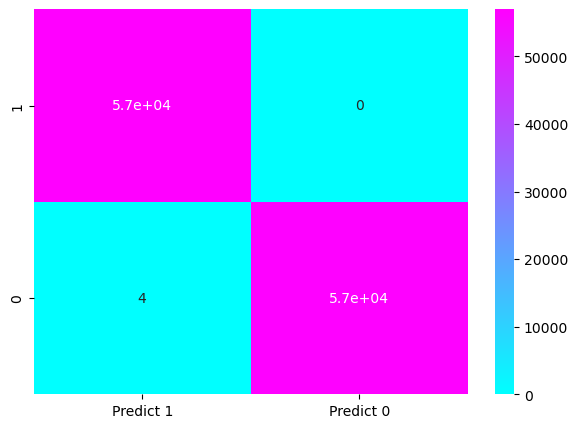

In [86]:
cm = confusion_matrix(Y_test, y_predict, labels = [1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, cmap = "cool")

In [88]:
print("Classification report")
print(metrics.classification_report(Y_test,y_predict, labels = [1,0]))

Classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56976
           0       1.00      1.00      1.00     56750

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# Results and Explanation 🐙🐙🐙🤖🤖

Since the RandomForest Classifier performs well we can use the RandomForest as our production model.
Here is a summary of our Classification report


1. **Precision**: The precision for both classes (1 and 0) is 1.00, indicating that the model achieved perfect precision. This means that all instances predicted as positive (1) or negative (0) were correct.

2. **Recall**: The recall for both classes is also 1.00, representing perfect recall. This indicates that the model correctly identified all instances of positive (1) and negative (0) classes.

3. **F1-Score**: The F1-score is 1.00 for both classes, indicating a perfect balance between precision and recall. This suggests that the model has excellent overall performance.

4. **Support**: The support represents the number of instances in each class. For class 1, there are 56,976 instances, and for class 0, there are 56,750 instances. The dataset appears to be well-balanced, with a similar number of instances in both classes.

5. **Accuracy**: The overall accuracy of the model is 1.00, indicating 100% accuracy. This means that the model correctly classified all instances in the dataset.

6. **Macro Average**: The macro average of precision, recall, and F1-score is 1.00. This indicates that the model performs equally well across all classes, without any bias towards a specific class.

7. **Weighted Average**: The weighted average of precision, recall, and F1-score is also 1.00. This average considers the support (number of instances) in each class, providing a weighted measure of performance.

Well this concludes this task😓😓😓. If you have any querries, corrections or any additions do not hesitate to get in touch with me through email[bennettmhlanga959@gmail.com] or direct message.😁😁